# API Profile: Projects

In [1]:
import requests
import pandas as pd

In [2]:
API_URL = 'http://127.0.0.1:5000/api/v2/'
time_response = []

List and search for projects: `/api/v2/projects`

In [3]:
def get_list_projects():
    method = 'projects'
    resp = requests.get(API_URL + method)
    
    time_response.append(resp.elapsed.total_seconds())
    
    print("Status code:" + str(resp.status_code))
    print("Time response:" + str(resp.elapsed))

Get popular projects: `/api/v2/projects/queries/popular`

In [4]:
def get_popular_projects():
    method = 'projects/queries/popular'
    resp = requests.get(API_URL + method)
    
    time_response.append(resp.elapsed.total_seconds())
    
    print("Status code:" + str(resp.status_code))
    print("Time response:" + str(resp.elapsed))

Get all user contributions on a project: `/api/v2/projects/{project_id}/contributions/`

In [5]:
def get_all_user_contribution_project(project_id):
    method = f'/api/v2/projects/{project_id}/contributions'
    
    resp = requests.get(API_URL + method)
    
    time_response.append(resp.elapsed.total_seconds())
    
    print("Status code:" + str(resp.status_code))
    print("Time response:" + str(resp.elapsed))

In [6]:
def main():
    
    project_id = 4
    
    get_list_projects()
    get_popular_projects()
    get_all_user_contribution_project(project_id)

if __name__ == '__main__':
    main()

Status code:200
Time response:0:00:00.011358
Status code:200
Time response:0:00:00.048989
Status code:200
Time response:0:00:00.001966
[0.011358, 0.048989, 0.001966]


In [7]:
data = {'API url': ['/api/v2/projects','/api/v2/projects/queries/popular','/api/v2/projects/{project_id}/contributions/'],
        'Time response': time_response
        }

df = pd.DataFrame(data, columns = ['API url', 'Time response'])
df.style

,API url,Time response
0,/api/v2/projects,0.011358
1,/api/v2/projects/queries/popular,0.048989
2,/api/v2/projects/{project_id}/contributions/,0.001966


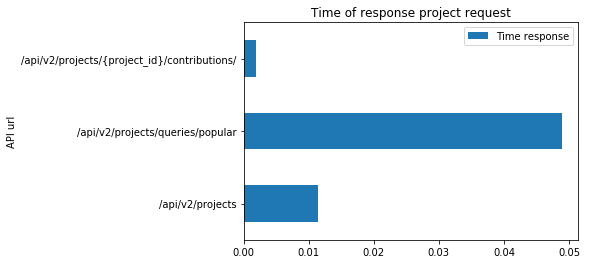

In [8]:
df.plot(title='Time of response project request', x ='API url', y='Time response', kind = 'barh')